In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/FinalYearProject Coding Phase')
print(os.getcwd())

/content/drive/My Drive/FinalYearProject Coding Phase


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
maindataset_path = "/content/drive/My Drive/FinalYearProject Coding Phase/iotdataset1.csv"
data = pd.read_csv(maindataset_path)
print(data.columns)

Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp', 'normality'],
      dtype='object')


In [7]:
data.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


In [8]:
data[data['normality']!='normal']

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
1301,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1/lightOn,/derived/boolean,write,1,1520032371775,anomalous(scan)
1303,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2/lightOn,/derived/boolean,write,1,1520032372093,anomalous(scan)
1312,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent2/tempin2,/sensorService,BedroomParents,/agent2/tempin2,/sensorService,read,19.9497,1520032373151,anomalous(scan)
1316,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent3/tempin3,/sensorService,Dinningroom,/agent3/tempin3,/sensorService,read,19.9497,1520032373984,anomalous(scan)
1322,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,read,19.9497,1520032374695,anomalous(scan)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357221,tempin14,/agent14/tempin14,/sensorService,Showerroom,/agent12/doorlock3,/doorLockService,Entrance,/agent12/doorlock3/open,/basic/text,write,true,1520117839563,anomalous(malitiousControl)
357508,tempin13,/agent13/tempin13,/sensorService,Bedroom,/agent12/doorlock3,/doorLockService,Entrance,/agent12/doorlock3/open,/basic/text,write,true,1520117900755,anomalous(malitiousControl)
357509,tempin14,/agent14/tempin14,/sensorService,Showerroom,/agent12/doorlock3,/doorLockService,Entrance,/agent12/doorlock3/open,/basic/text,write,true,1520117900758,anomalous(malitiousControl)
357796,tempin13,/agent13/tempin13,/sensorService,Bedroom,/agent12/doorlock3,/doorLockService,Entrance,/agent12/doorlock3/open,/basic/text,write,true,1520117961449,anomalous(malitiousControl)


**Preprocessing (as per the base paper)**

In [0]:
data.loc[data.value=='twenty',"value"] = '20.0'
data.loc[data.value=='false',"value"] = '0'
data.loc[data.value=='true',"value"] = '1'
data.loc[data.value=='none',"value"] = '0'
data.loc[data.value=='0',"value"] = '0.0'
data['value'] = data['value'].fillna(value='60.0')
data = data.drop(data.index[data.value.str.contains("org.*")])
data.value = data.value.astype(float)

**Data Cleaning**

In [10]:
data['accessedNodeType'] = data['accessedNodeType'].fillna(value='/Malicious')
data.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


In [11]:
data['normality'].unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

**Visualization**

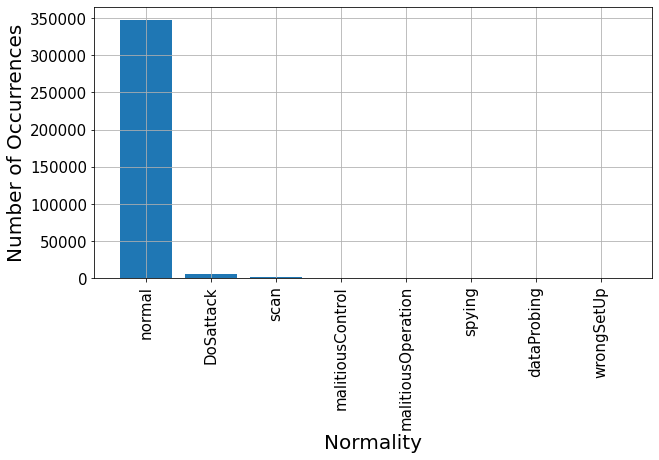

In [12]:
normality_count = data.normality.value_counts()
indices = ['normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']
plt.figure(figsize=(10,5))
ax=plt.subplot(111)
plt.grid()
plt.bar(indices, normality_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [0]:
data = data.drop('timestamp',axis=1)

In [14]:
data.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,normal


In [0]:
#The Features
df = data.iloc[:,:-1]

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
#converting features in to integers
df = df.apply(LabelEncoder().fit_transform)

In [18]:
df.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value
0,21,30,2,3,30,2,3,59,7,2,0
1,32,70,2,4,68,2,4,134,7,2,0
2,15,1,2,2,0,2,2,0,7,2,0
3,33,77,2,7,73,2,7,144,7,2,0
4,55,78,3,7,74,3,7,146,8,2,0


In [19]:
df.dtypes

sourceID                     int64
sourceAddress                int64
sourceType                   int64
sourceLocation               int64
destinationServiceAddress    int64
destinationServiceType       int64
destinationLocation          int64
accessedNodeAddress          int64
accessedNodeType             int64
operation                    int64
value                        int64
dtype: object

In [20]:
#scaling
final_df = df/df.max()
final_df.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value
0,0.253012,0.340909,0.285714,0.15,0.357143,0.285714,0.15,0.349112,0.583333,0.666667,0.0
1,0.385542,0.795455,0.285714,0.20,0.809524,0.285714,0.20,0.792899,0.583333,0.666667,0.0
2,0.180723,0.011364,0.285714,0.10,0.000000,0.285714,0.10,0.000000,0.583333,0.666667,0.0
3,0.397590,0.875000,0.285714,0.35,0.869048,0.285714,0.35,0.852071,0.583333,0.666667,0.0
4,0.662651,0.886364,0.428571,0.35,0.880952,0.428571,0.35,0.863905,0.666667,0.666667,0.0


In [21]:
X = final_df.values
# final dataframe has 11 features
print("Shape of feature matrix : ",X.shape)

Shape of feature matrix :  (357941, 11)


**Using Label encoder to convert threat types into numerics**

In [22]:
threat_types = data["normality"].values
encoder = LabelEncoder()
y = encoder.fit_transform(threat_types)
print("Shape of target vector : ",y.shape)

Shape of target vector :  (357941,)


In [23]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

**Test Train Split**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42, stratify=y)
print("Number of records in training data : ", X_train.shape)
print("Number of records in test data : ", X_test.shape)
print("Total distinct number of threat types in training data : ",len(set(y_train)))
print("Total distinct number of threat types in test data : ",len(set(y_test)))

Number of records in training data :  (214764, 11)
Number of records in test data :  (143177, 11)
Total distinct number of threat types in training data :  8
Total distinct number of threat types in test data :  8


In [0]:
#!pip install syft

In [25]:
import torch as th
import syft as sy

# Hook PyTorch ie add extra functionalities to support Federated Learning
hook = sy.TorchHook(th)
# Sets the seed for generating random numbers.
th.manual_seed(1)
# Select CPU computation, in case you want GPU use "cuda" instead
device = th.device("cpu")
# Data will be distributed among these VirtualWorkers.
# Remote training of the model will happen here: gateway1 and gateway2
gateway1 = sy.VirtualWorker(hook, id="gateway1")
gateway2 = sy.VirtualWorker(hook, id="gateway2")

In [26]:
# Number of times we want to iterate over whole training data
BATCH_SIZE = 1000
EPOCHS = 5
LOG_INTERVAL = 5
lr = 0.01

n_feature = X_train.shape[1]
n_class = np.unique(y_train).shape[0]

print("Number of training features : ",n_feature)
print("Number of training classes : ",n_class)

Number of training features :  11
Number of training classes :  8


In [0]:
# Create pytorch tensor from X_train,y_train,X_test,y_test
train_inputs = th.tensor(X_train,dtype=th.float)
train_labels = th.tensor(y_train)
test_inputs = th.tensor(X_test,dtype=th.float)
test_labels = th.tensor(y_test)

# Send the training and test data to the gatways in equal proportion.
# since there are two gateways we are splitting into two : 
train_idx = int(len(train_labels)/2)
test_idx = int(len(test_labels)/2)
gateway1_train_dataset = sy.BaseDataset(train_inputs[:train_idx], train_labels[:train_idx]).send(gateway1)
gateway2_train_dataset = sy.BaseDataset(train_inputs[train_idx:], train_labels[train_idx:]).send(gateway2)
gateway1_test_dataset = sy.BaseDataset(test_inputs[:test_idx], test_labels[:test_idx]).send(gateway1)
gateway2_test_dataset = sy.BaseDataset(test_inputs[test_idx:], test_labels[test_idx:]).send(gateway2)

# Create federated datasets, an extension of Pytorch TensorDataset class
federated_train_dataset = sy.FederatedDataset([gateway1_train_dataset, gateway2_train_dataset])
federated_test_dataset = sy.FederatedDataset([gateway1_test_dataset, gateway2_test_dataset])

# Create federated dataloaders, an extension of Pytorch DataLoader class
federated_train_loader = sy.FederatedDataLoader(federated_train_dataset, shuffle=True, batch_size=BATCH_SIZE)
federated_test_loader = sy.FederatedDataLoader(federated_test_dataset, shuffle=False, batch_size=BATCH_SIZE)

**Constructing Neural Network**

In [0]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        input_dim: number of input features.
        output_dim: number of labels.
        """
        super(Net, self).__init__()
        self.linear = th.nn.Linear(input_dim, output_dim)
    def forward(self, x):
        outputs = self.linear(x)
        return outputs

**Training Using Neural Network**

In [0]:
import torch.nn.functional as F

def train(model, device, federated_train_loader, optimizer, epoch):
    model.train()
    # Iterate through each gateway's dataset
    for idx, (data, target) in enumerate(federated_train_loader):
        batch_idx = idx+1
        # Send the model to the right gateway
        model.send(data.location)
        # Move the data and target labels to the device (cpu/gpu) for computation
        data, target = data.to(device), target.to(device)
        # Clear previous gradients (if they exist)
        optimizer.zero_grad()
        # Make a prediction
        output = model(data)
        # Calculate the cross entropy loss [We are doing classification]
        loss = F.cross_entropy(output, target)
        # Calculate the gradients
        loss.backward()
        # Update the model weights
        optimizer.step()
        # Get the model back from the gateway
        model.get()
        if batch_idx==len(federated_train_loader) or (batch_idx!=0 and batch_idx % LOG_INTERVAL == 0):
            # get the loss back
            loss = loss.get()
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * BATCH_SIZE, len(federated_train_loader) * BATCH_SIZE,
                100. * batch_idx / len(federated_train_loader), loss.item()))

In [0]:
def test(model, device, federated_test_loader):
    model.eval()
    correct = 0
    with th.no_grad():
        for batch_idx, (data, target) in enumerate(federated_test_loader):
            # Send the model to the right gateway
            model.send(data.location)
            # Move the data and target labels to the device (cpu/gpu) for computation
            data, target = data.to(device), target.to(device)
            # Make a prediction
            output = model(data)
            # Get the model back from the gateway
            model.get()
            # Calculate the cross entropy loss
            loss = F.cross_entropy(output, target)
            # Get the index of the max log-probability 
            pred = output.argmax(1, keepdim=True)
            # Get the number of instances correctly predicted
            correct += pred.eq(target.view_as(pred)).sum().get()
                
    # get the loss back
    loss = loss.get()
    print('Test set: Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss.item(), correct, len(federated_test_loader.federated_dataset),
        100. * correct / len(federated_test_loader.federated_dataset)))

In [31]:
%%time
import torch.optim as optim

# Initialize the model
model = Net(n_feature,n_class)

#Initialize the SGD optimizer
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(1, 5 + 1):
    # Train on the training data in a federated way
    train(model, device, federated_train_loader, optimizer, epoch)
    # Check the test accuracy on unseen test data in a federated way
    test(model, device, federated_test_loader)

Train Epoch: 1 [5000/215000 (2%)]	Loss: 2.455962
Train Epoch: 1 [10000/215000 (5%)]	Loss: 2.335189
Train Epoch: 1 [15000/215000 (7%)]	Loss: 2.188545
Train Epoch: 1 [20000/215000 (9%)]	Loss: 2.062961
Train Epoch: 1 [25000/215000 (12%)]	Loss: 1.935561
Train Epoch: 1 [30000/215000 (14%)]	Loss: 1.809717
Train Epoch: 1 [35000/215000 (16%)]	Loss: 1.692362
Train Epoch: 1 [40000/215000 (19%)]	Loss: 1.592702
Train Epoch: 1 [45000/215000 (21%)]	Loss: 1.497311
Train Epoch: 1 [50000/215000 (23%)]	Loss: 1.394139
Train Epoch: 1 [55000/215000 (26%)]	Loss: 1.303148
Train Epoch: 1 [60000/215000 (28%)]	Loss: 1.218800
Train Epoch: 1 [65000/215000 (30%)]	Loss: 1.156517
Train Epoch: 1 [70000/215000 (33%)]	Loss: 1.087515
Train Epoch: 1 [75000/215000 (35%)]	Loss: 1.046082
Train Epoch: 1 [80000/215000 (37%)]	Loss: 0.953104
Train Epoch: 1 [85000/215000 (40%)]	Loss: 0.922632
Train Epoch: 1 [90000/215000 (42%)]	Loss: 0.877691
Train Epoch: 1 [95000/215000 (44%)]	Loss: 0.825297
Train Epoch: 1 [100000/215000 (47%)]

In [32]:
from google.colab import files
# Save the model
th.save(model.state_dict(), "network-threat-kaggle-model.pt")
#Download Model
files.download('network-threat-kaggle-model.pt')
# Reload the model in a new model object
model_new = Net(n_feature,n_class)
model_new.load_state_dict(th.load("network-threat-kaggle-model.pt"))
model_new.eval()

Net(
  (linear): Linear(in_features=11, out_features=8, bias=True)
)

In [33]:
# Take the 122th record from the test data
idx = 122
data = test_inputs[idx]
pred = model_new(data)
pred_label = int(pred.argmax().data.cpu().numpy())
pred_threat = encoder.inverse_transform([pred_label])[0]
print("Predicted threat type : ", pred_threat)
actual_label = int(test_labels[idx].data.cpu().numpy())
actual_threat = encoder.inverse_transform([actual_label])[0]
print("Actual threat type : ", actual_threat)

Predicted threat type :  normal
Actual threat type :  normal
